In [ ]:

import numpy as np # linear algebra
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
cols=['TweetID', 'Topic', 'Target', 'Text']
train = pd.read_csv('/content/twitter_training.csv',names=cols, on_bad_lines='skip',quoting=3)

valid = pd.read_csv('/content/twitter_validation .csv',names=cols, on_bad_lines='skip')

In [ ]:
train.head()

TweetID                                              Topic  \
2401 Borderlands  Positive  "im getting on borderlands and i will murder y...   
     Borderlands  Positive  "I am coming to the borders and I will kill yo...   
     Borderlands  Positive  "im getting on borderlands and i will kill you...   
     Borderlands  Positive  "im coming on borderlands and i will murder yo...   
     Borderlands  Positive  "im getting on borderlands 2 and i will murder...   

                 Target  Text  
2401 Borderlands      "   NaN  
     Borderlands      "   NaN  
     Borderlands      "   NaN  
     Borderlands      "   NaN  
     Borderlands      "   NaN

In [ ]:
valid.head()

,TweetID,Topic,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
dataset = pd.concat([train, valid], ignore_index = False)
dataset.head()

,TweetID,Topic,Target,Text
"(2401, Borderlands)",Positive,"""im getting on borderlands and i will murder y...","""",NaN
"(2401, Borderlands)",Positive,"""I am coming to the borders and I will kill yo...","""",NaN
"(2401, Borderlands)",Positive,"""im getting on borderlands and i will kill you...","""",NaN
"(2401, Borderlands)",Positive,"""im coming on borderlands and i will murder yo...","""",NaN
"(2401, Borderlands)",Positive,"""im getting on borderlands 2 and i will murder...","""",NaN


In [ ]:

dataset = pd.concat([train, valid], ignore_index = False)
dataset.head()


,TweetID,Topic,Target,Text
"(2401, Borderlands)",Positive,"""im getting on borderlands and i will murder y...","""",NaN
"(2401, Borderlands)",Positive,"""I am coming to the borders and I will kill yo...","""",NaN
"(2401, Borderlands)",Positive,"""im getting on borderlands and i will kill you...","""",NaN
"(2401, Borderlands)",Positive,"""im coming on borderlands and i will murder yo...","""",NaN
"(2401, Borderlands)",Positive,"""im getting on borderlands 2 and i will murder...","""",NaN


In [ ]:
dataset.describe()

,TweetID,Topic,Target,Text
count,22872,22652,4782,1000
unique,1004,19779,3379,999
top,Positive,It is not the first time that the EU Commissio...,Neutral,Wow
freq,6740,48,285,2


In [ ]:

dataset['Topic'].value_counts()

Topic
It is not the first time that the EU Commission has taken such a step.       48
                                                                             48
RedDeadRedemption(RDR)                                                       40
johnson&johnson                                                              39
PlayerUnknownsBattlegrounds(PUBG)                                            38
                                                                             ..
Gold looks good for you D.Va.                                                 1
Gold looks good on you D.Va .                                                 1
My Movie Overwatch Event.                                                     1
My Favorite Live Overwatch Event.                                             1
Pretty good AND wrapped 3 presents and got these. MY 4TH LEBRON WTF!!!!!.     1
Name: count, Length: 19779, dtype: int64

In [ ]:
dataset.isna().sum()

TweetID        0
Topic        220
Target     18090
Text       21872
dtype: int64

In [ ]:
dataset.duplicated().sum()

1458

In [ ]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.isnull().sum()
dataset.duplicated().sum()

0

<Axes: xlabel='Topic'>

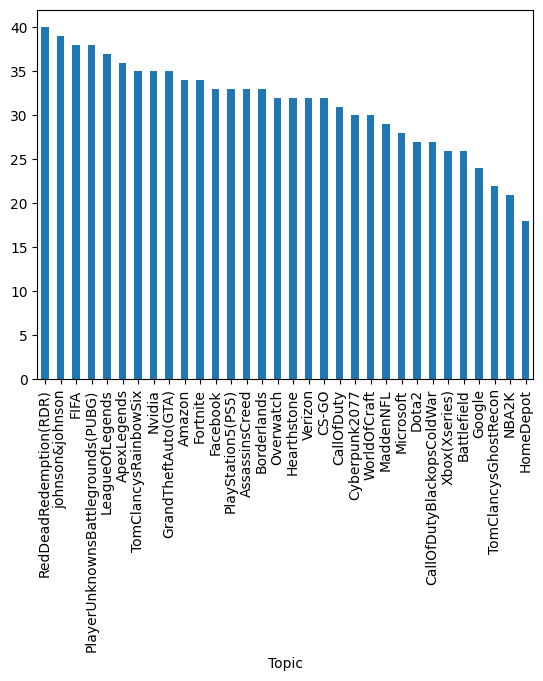

In [ ]:
dataset['Topic'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Target', ylabel='Topic'>

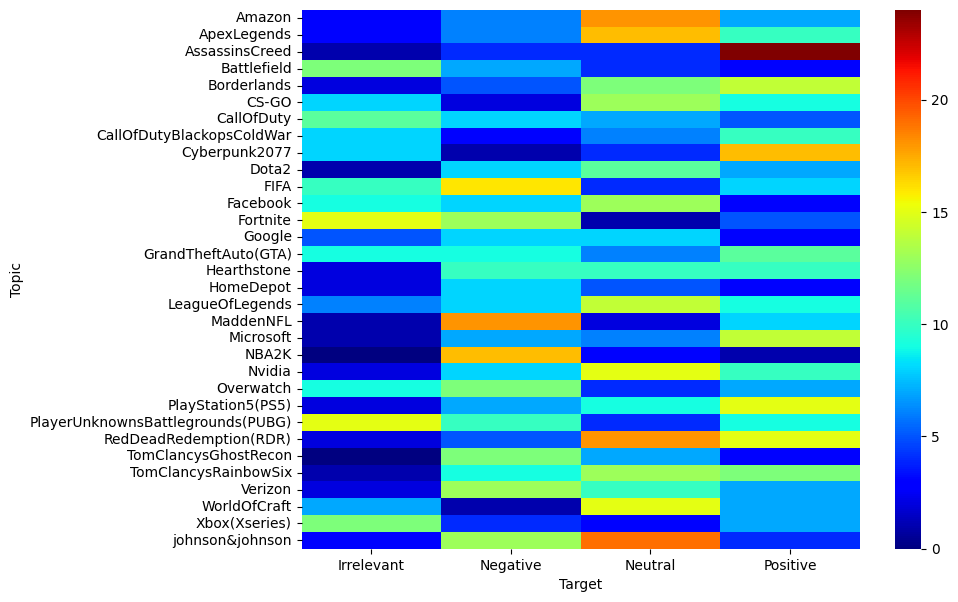

In [ ]:
plt.figure(figsize=(9,7))
crosstab = pd.crosstab(index=dataset['Topic'], columns=dataset['Target'])
sns.heatmap(crosstab, cmap = 'jet')


In [ ]:
crosstab.head()


Target,Irrelevant,Negative,Neutral,Positive
Topic,,,,
Amazon,3,6,18,7
ApexLegends,3,6,17,10
AssassinsCreed,1,4,4,24
Battlefield,12,7,4,3
Borderlands,2,5,12,14


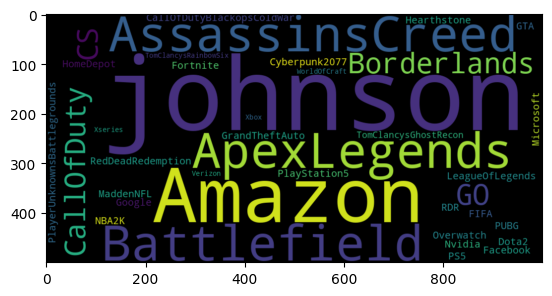

In [ ]:
from wordcloud import WordCloud

# Note that topics are the index of crosstab DF

topic_list = ' '.join(crosstab.index)

# topic_list = dataset['Topic'].values.tolist()

wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

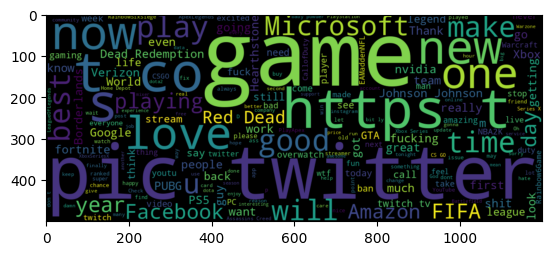

In [ ]:
corpus = ' '.join(dataset['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')

<ipython-input-24-f2c61340e9d8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TweetID', data=df, palette='viridis')


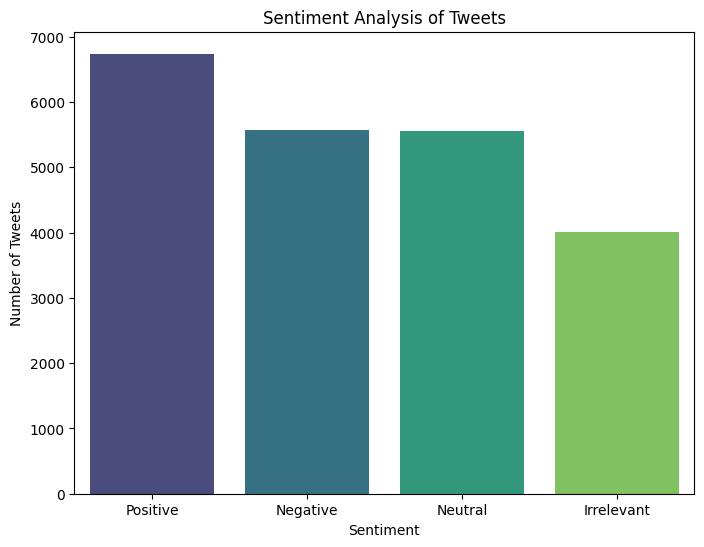

In [ ]:
df = pd.DataFrame(train)

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='TweetID', data=df, palette='viridis')
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

